In [61]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc, plot_lift_curve
from result_generator import show_report

NameError: name 'tests' is not defined

# Data Preparation

In [59]:
def getting_data_ready():

    # for loading all the data
    df = pd.read_csv('./data/scaled_datatrainingcopy.csv')
    df_test1 = pd.read_csv('./data/scaled_datatestcopy.csv')
    df_test2 = pd.read_csv('./data/scaled_datatest2copy.csv')

    class_name = "Occupancy"

    attributes = [col for col in df.columns if col != class_name]
    X = df[attributes].values
    y = df[class_name]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

    attributes = [col for col in df.columns if col != class_name]
    X_test1 = df_test1[attributes].values
    y_test1 = df_test1[class_name]


    attributes = [col for col in df.columns if col != class_name]
    X_test2 = df_test2[attributes].values
    y_test2 = df_test2[class_name]
    
    
    return X_train, X_test, y_train, y_test, X_test1, y_test1, X_test2, y_test2

In [60]:
X_train, X_test, y_train, y_test, X_test1, y_test1, X_test2, y_test2 = getting_data_ready()

# this is list to be used in testing automation

tests = [(X_test,y_test,"Training"),(X_test1,y_test1,"TestSet 1"),
         (X_test2,y_test2,"TestSet 2")]


## defining a fuction that will show us all the results in three cases 

# Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier


 ===============Results for Training================== 

Accuracy 0.9938600081866558
F1-score [0.99610288 0.9855352 ]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1924
           1       0.99      0.98      0.99       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



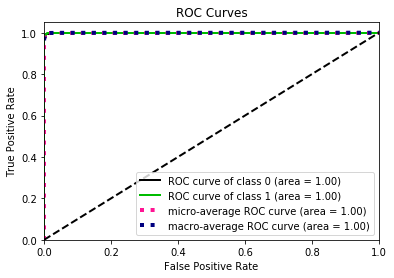

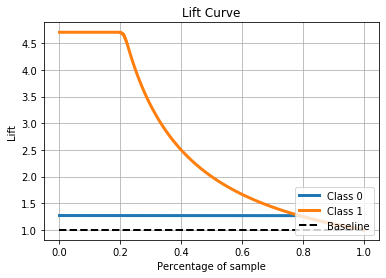


 ===============Results for TestSet 1================== 

Accuracy 0.9230769230769231
F1-score [0.94181096 0.8865523 ]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1693
           1       0.96      0.82      0.89       972

    accuracy                           0.92      2665
   macro avg       0.93      0.90      0.91      2665
weighted avg       0.93      0.92      0.92      2665



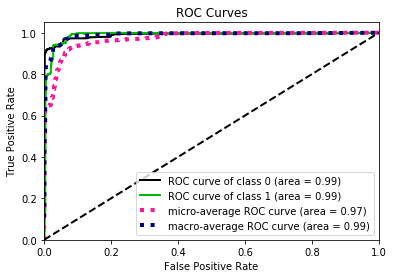

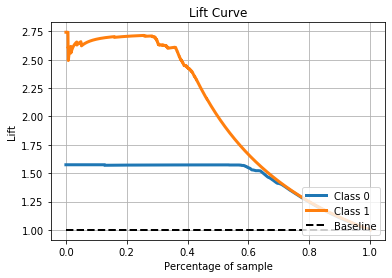


 ===============Results for TestSet 2================== 

Accuracy 0.958264971287941
F1-score [0.97417021 0.89137977]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7703
           1       0.98      0.82      0.89      2049

    accuracy                           0.96      9752
   macro avg       0.97      0.91      0.93      9752
weighted avg       0.96      0.96      0.96      9752



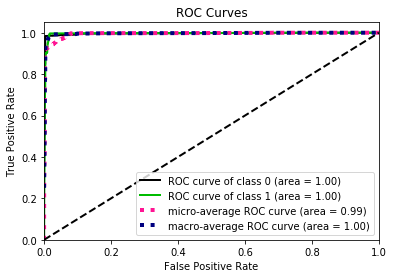

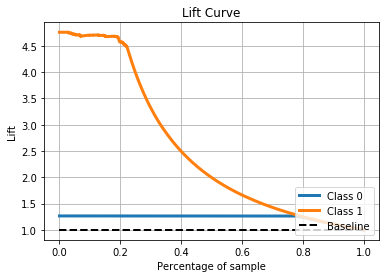

In [63]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)
clf.fit(X_train, y_train)
show_report(tests)

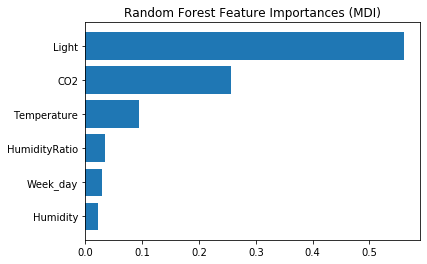

In [17]:
nbr_features = 15
feature_names = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Week_day']

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(feature_names)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

In [18]:
from sklearn.inspection import permutation_importance

/Users/piyush2017/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [19]:
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

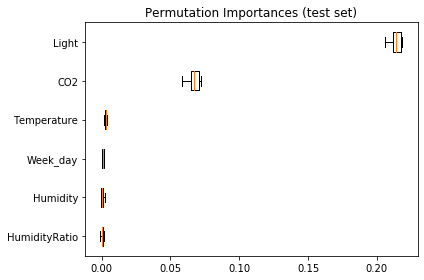

In [20]:
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(feature_names)[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

We are not using the below code because don't need it

In [21]:
# import pydotplus
# from sklearn import tree
# from IPython.display import Image

In [53]:
# dot_data = tree.export_graphviz(clf.estimators_[0], out_file=None,  
#                                 feature_names=feature_names, 
#                                 class_names=['non-occupied', 'non-occupied'],  
#                                 filled=True, rounded=True,  
#                                 special_characters=True, max_depth=4)  
# graph = pydotplus.graph_from_dot_data(dot_data)  
# Image(graph.create_png())

In [54]:
# dot_data = tree.export_graphviz(clf.estimators_[1], out_file=None,  
#                                 feature_names=feature_names, 
#                                 class_names=['non-occupied', 'non-occupied'],  
#                                 filled=True, rounded=True,  
#                                 special_characters=True, max_depth=4)  
# graph = pydotplus.graph_from_dot_data(dot_data)  
# Image(graph.create_png())


 ===============Results for Training================== 

Accuracy 0.9938600081866558
F1-score [0.99610895 0.98545102]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1924
           1       0.99      0.98      0.99       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



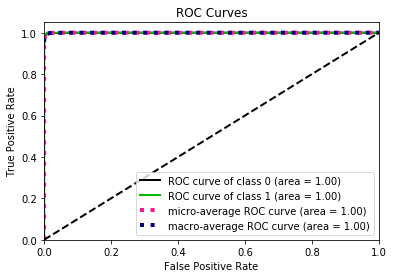

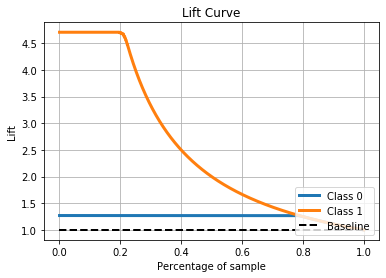


 ===============Results for TestSet 1================== 

Accuracy 0.8840525328330207
F1-score [0.9159641  0.81306715]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1693
           1       0.99      0.69      0.81       972

    accuracy                           0.88      2665
   macro avg       0.92      0.84      0.86      2665
weighted avg       0.90      0.88      0.88      2665



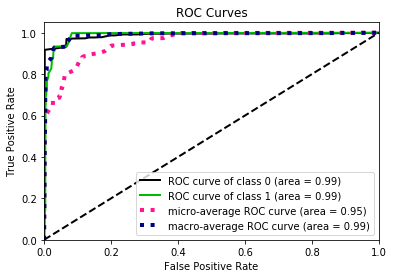

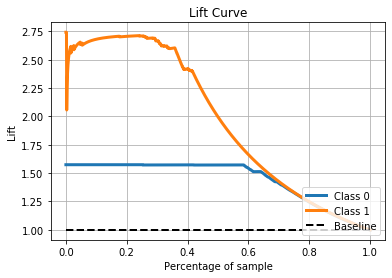


 ===============Results for TestSet 2================== 

Accuracy 0.9387817883511075
F1-score [0.9625588  0.83225625]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      7703
           1       0.98      0.72      0.83      2049

    accuracy                           0.94      9752
   macro avg       0.96      0.86      0.90      9752
weighted avg       0.94      0.94      0.94      9752



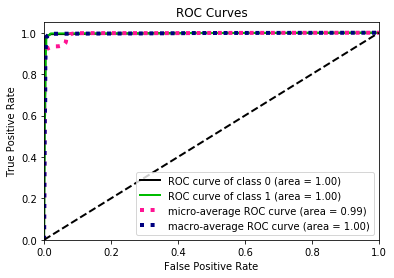

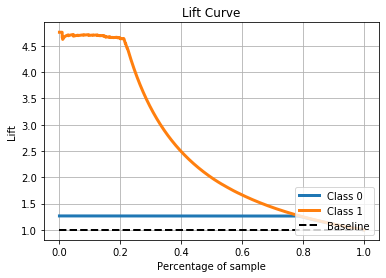

In [26]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=4, random_state=0)
clf.fit(X_train, y_train)

show_report(tests)


 ===============Results for Training================== 

Accuracy 0.9930413426115432
F1-score [0.99558785 0.98354308]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1924
           1       0.99      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



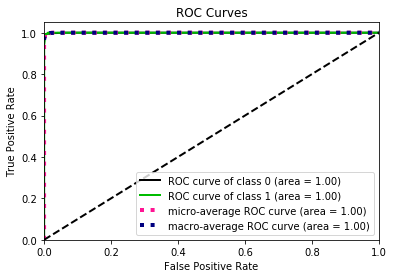

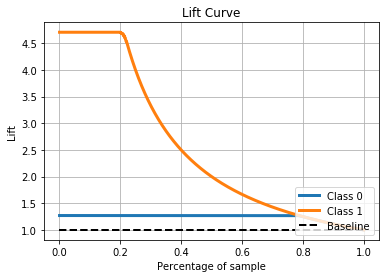


 ===============Results for TestSet 1================== 

Accuracy 0.9279549718574108
F1-score [0.94520548 0.89485214]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1693
           1       0.96      0.84      0.89       972

    accuracy                           0.93      2665
   macro avg       0.94      0.91      0.92      2665
weighted avg       0.93      0.93      0.93      2665



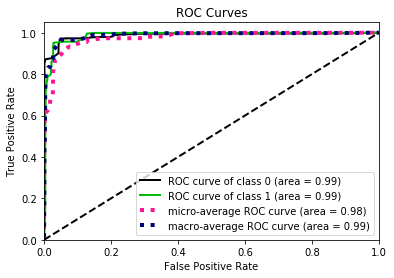

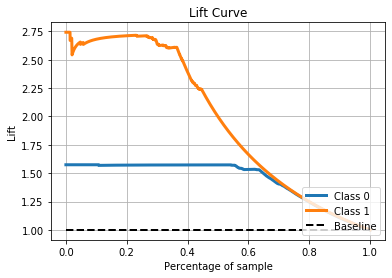


 ===============Results for TestSet 2================== 

Accuracy 0.9532403609515997
F1-score [0.97114289 0.87682334]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7703
           1       0.98      0.79      0.88      2049

    accuracy                           0.95      9752
   macro avg       0.96      0.89      0.92      9752
weighted avg       0.95      0.95      0.95      9752



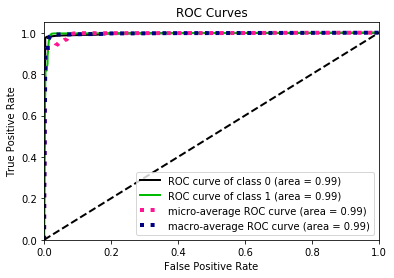

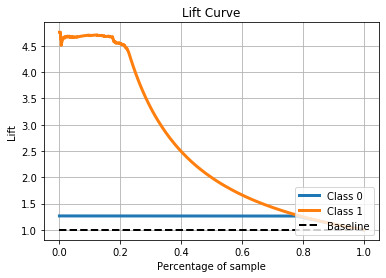

In [27]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', random_state=0)
clf.fit(X_train, y_train)

show_report(tests)

# done till here


 ===============Results for Training================== 

Accuracy 0.9897666803110929
F1-score [0.99347769 0.97625831]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1924
           1       0.96      0.99      0.98       519

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.98      2443
weighted avg       0.99      0.99      0.99      2443



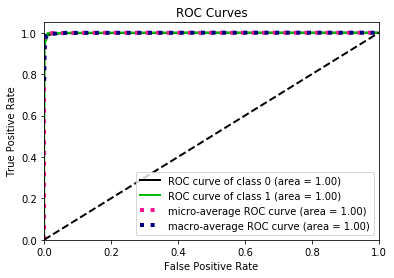

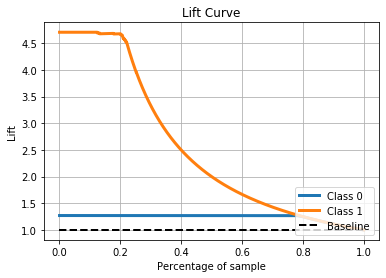


 ===============Results for TestSet 1================== 

Accuracy 0.9163227016885553
F1-score [0.93755251 0.87322342]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1693
           1       0.98      0.79      0.87       972

    accuracy                           0.92      2665
   macro avg       0.93      0.89      0.91      2665
weighted avg       0.92      0.92      0.91      2665



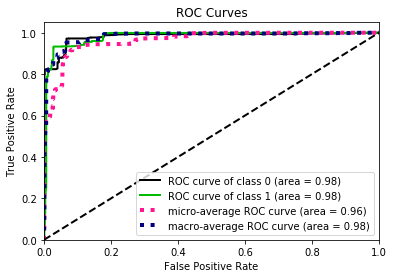

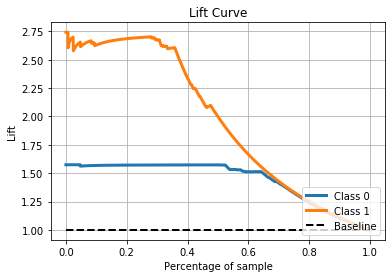


 ===============Results for TestSet 2================== 

Accuracy 0.9858490566037735
F1-score [0.99107605 0.96584158]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7703
           1       0.98      0.95      0.97      2049

    accuracy                           0.99      9752
   macro avg       0.98      0.97      0.98      9752
weighted avg       0.99      0.99      0.99      9752



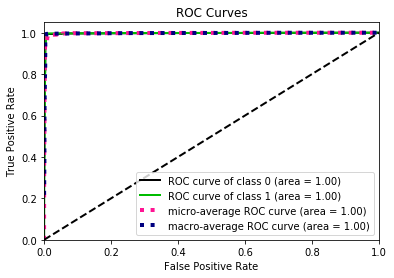

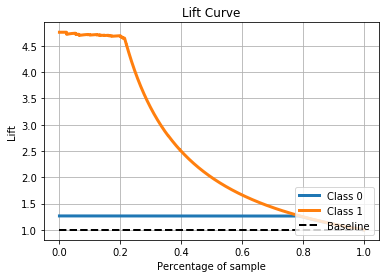

In [29]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=4, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', random_state=0)
clf.fit(X_train, y_train)

show_report(tests)

### Tuning the hyper-parameters

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Results for GridSearchCV

In [33]:
param_list = {'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20],
             }

grid_search = GridSearchCV(clf, param_grid=param_list, cv=5)
grid_search.fit(X_train, y_train)
clf = grid_search.best_estimator_


 ===============Results for Training================== 

Accuracy 0.9930413426115432
F1-score [0.99557637 0.98370086]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1924
           1       0.98      0.99      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



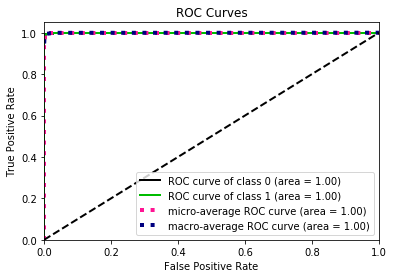

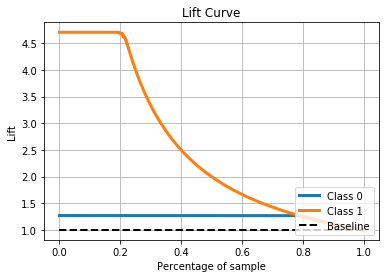


 ===============Results for TestSet 1================== 

Accuracy 0.9208255159474672
F1-score [0.94017579 0.88297282]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1693
           1       0.96      0.82      0.88       972

    accuracy                           0.92      2665
   macro avg       0.93      0.90      0.91      2665
weighted avg       0.92      0.92      0.92      2665



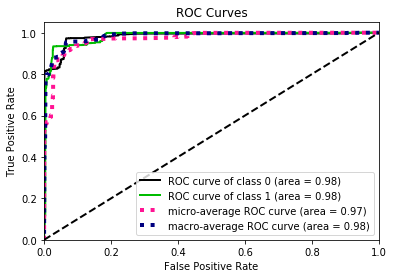

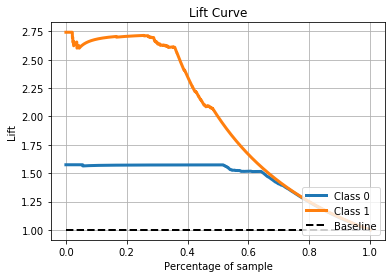


 ===============Results for TestSet 2================== 

Accuracy 0.9519073010664479
F1-score [0.97036709 0.87245037]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7703
           1       0.99      0.78      0.87      2049

    accuracy                           0.95      9752
   macro avg       0.97      0.89      0.92      9752
weighted avg       0.95      0.95      0.95      9752



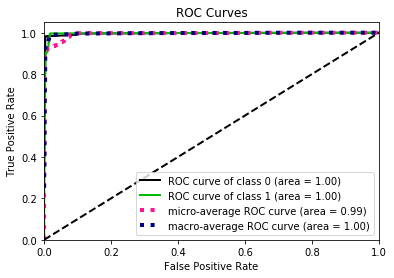

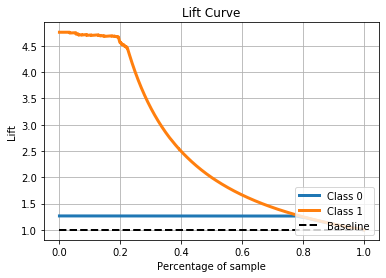

In [34]:
show_report(tests)

# Here we are using RandomizedSearchCV

In [35]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
             }

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=20, cv=5)
random_search.fit(X_train, y_train)
clf = random_search.best_estimator_


 ===============Results for Training================== 

Accuracy 0.9926320098239869
F1-score [0.99531738 0.98272553]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1924
           1       0.98      0.99      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



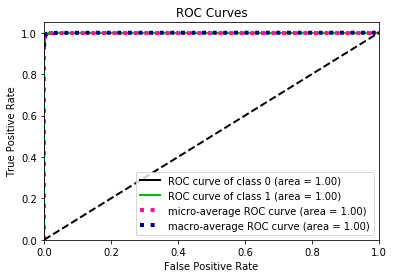

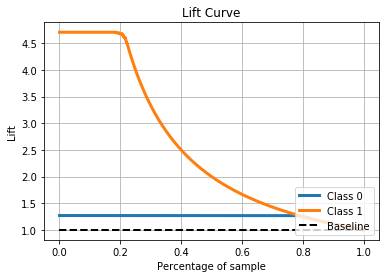


 ===============Results for TestSet 1================== 

Accuracy 0.9234521575984991
F1-score [0.94207836 0.88716814]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1693
           1       0.96      0.83      0.89       972

    accuracy                           0.92      2665
   macro avg       0.93      0.90      0.91      2665
weighted avg       0.93      0.92      0.92      2665



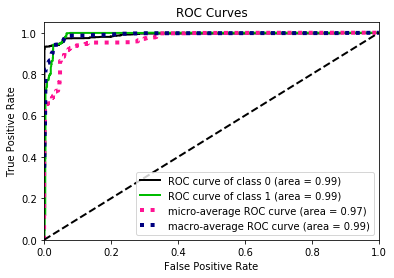

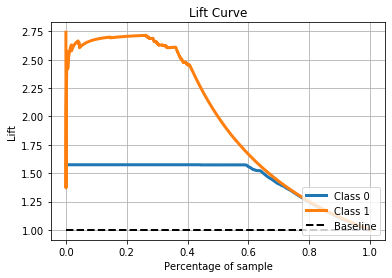


 ===============Results for TestSet 2================== 

Accuracy 0.9668785890073831
F1-score [0.97938079 0.91586351]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7703
           1       0.98      0.86      0.92      2049

    accuracy                           0.97      9752
   macro avg       0.97      0.93      0.95      9752
weighted avg       0.97      0.97      0.97      9752



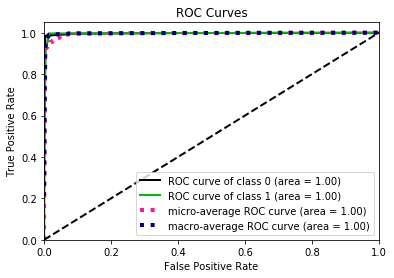

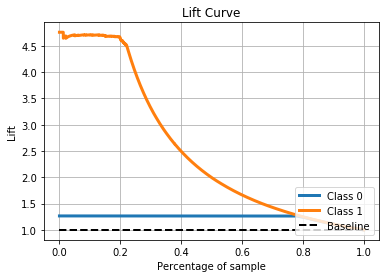

In [36]:
show_report(tests)

# Bagging

In [37]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

If None, then the base estimator is a decision tree.

## in this case we are using no base_estimator

In [38]:
clf = BaggingClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=100,
                  n_jobs=None, oob_score=False, random_state=0, verbose=0,
                  warm_start=False)


 ===============Results for Training================== 

Accuracy 0.9922226770364306
F1-score [0.99507644 0.98149951]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1924
           1       0.99      0.97      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.98      0.99      2443
weighted avg       0.99      0.99      0.99      2443



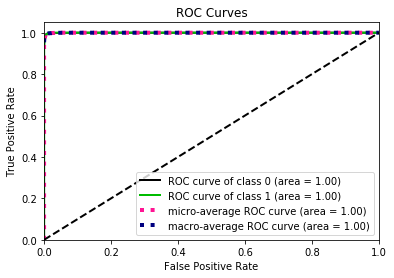

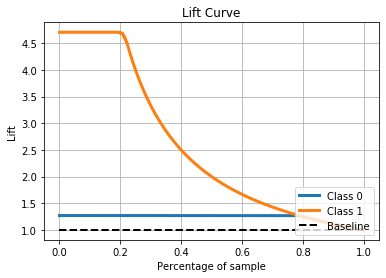


 ===============Results for TestSet 1================== 

Accuracy 0.874671669793621
F1-score [0.90982721 0.79458795]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1693
           1       0.99      0.66      0.79       972

    accuracy                           0.87      2665
   macro avg       0.91      0.83      0.85      2665
weighted avg       0.89      0.87      0.87      2665



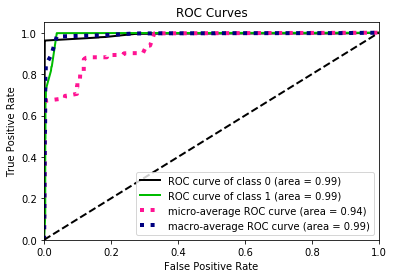

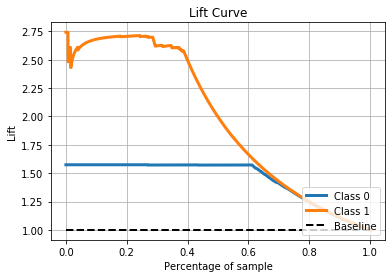


 ===============Results for TestSet 2================== 

Accuracy 0.9358080393765381
F1-score [0.96079659 0.8229638 ]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      7703
           1       0.98      0.71      0.82      2049

    accuracy                           0.94      9752
   macro avg       0.95      0.85      0.89      9752
weighted avg       0.94      0.94      0.93      9752



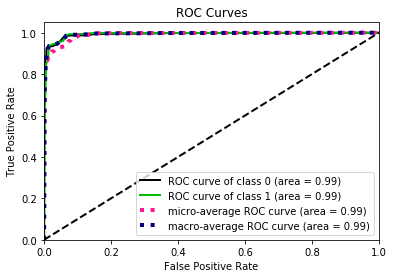

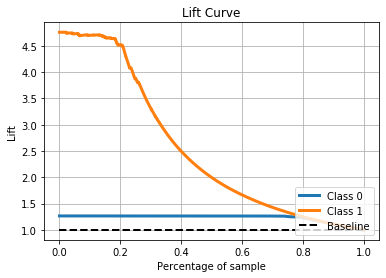

In [41]:
show_report(tests, clf)

## in this case we are using base_estimator as SVM

In [42]:
clf = BaggingClassifier(base_estimator=SVC(C=1000), n_estimators=10, random_state=0)
clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(C=1000, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=0, verbose=0, warm_start=False)


 ===============Results for Training================== 

Accuracy 0.9905853458862055
F1-score [0.99402132 0.97786333]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1924
           1       0.98      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



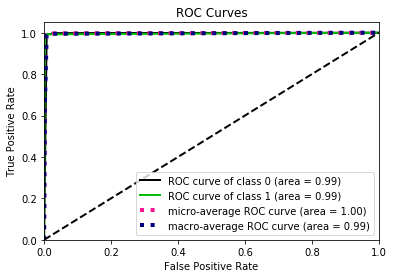

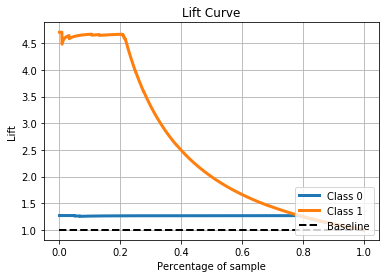


 ===============Results for TestSet 1================== 

Accuracy 0.9215759849906191
F1-score [0.93968254 0.88793566]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1693
           1       0.93      0.85      0.89       972

    accuracy                           0.92      2665
   macro avg       0.92      0.91      0.91      2665
weighted avg       0.92      0.92      0.92      2665



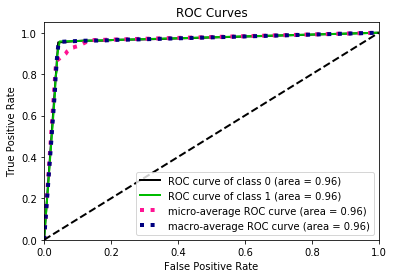

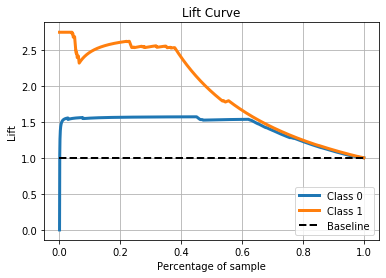


 ===============Results for TestSet 2================== 

Accuracy 0.9222723543888434
F1-score [0.95075364 0.81566148]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7703
           1       0.81      0.82      0.82      2049

    accuracy                           0.92      9752
   macro avg       0.88      0.88      0.88      9752
weighted avg       0.92      0.92      0.92      9752



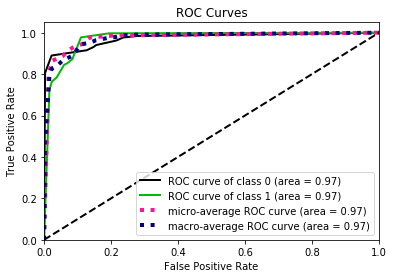

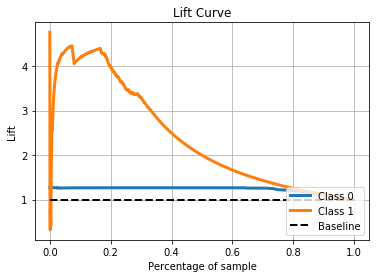

In [44]:
show_report(tests, clf)

## in this case we are using base_estimator as RandomForestClassifier

In [51]:
clf = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
     


 ===============Results for Training================== 

Accuracy 0.9938600081866558
F1-score [0.99610288 0.9855352 ]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1924
           1       0.99      0.98      0.99       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



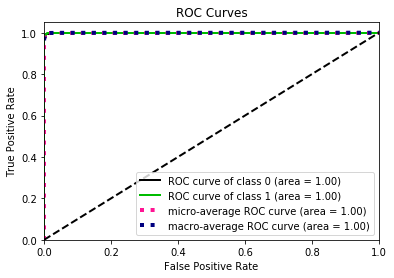

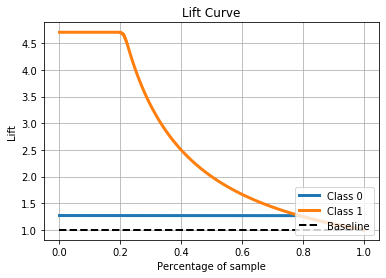


 ===============Results for TestSet 1================== 

Accuracy 0.9230769230769231
F1-score [0.94181096 0.8865523 ]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1693
           1       0.96      0.82      0.89       972

    accuracy                           0.92      2665
   macro avg       0.93      0.90      0.91      2665
weighted avg       0.93      0.92      0.92      2665



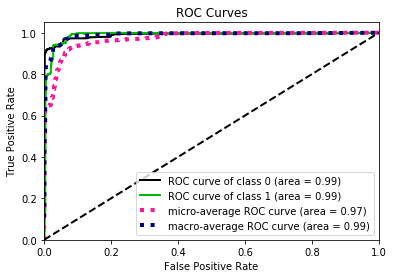

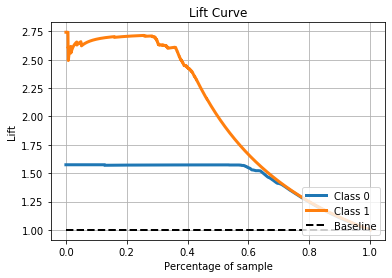


 ===============Results for TestSet 2================== 

Accuracy 0.958264971287941
F1-score [0.97417021 0.89137977]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7703
           1       0.98      0.82      0.89      2049

    accuracy                           0.96      9752
   macro avg       0.97      0.91      0.93      9752
weighted avg       0.96      0.96      0.96      9752



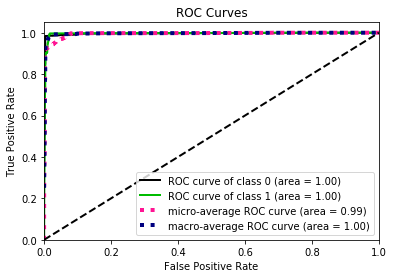

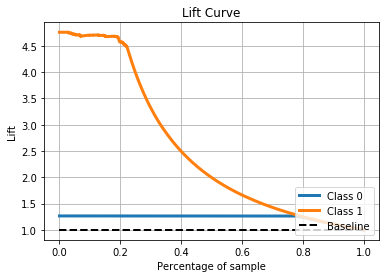

In [55]:
show_report()

# Boosting

In [45]:
from sklearn.ensemble import AdaBoostClassifier

If None, then the base estimator is DecisionTreeClassifier(max_depth=1).

In [46]:
clf = AdaBoostClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)


 ===============Results for Training================== 

Accuracy 0.994269340974212
F1-score [0.99636364 0.98648649]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1924
           1       0.99      0.98      0.99       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



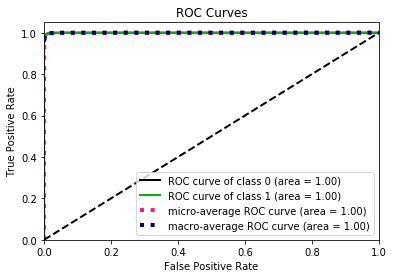

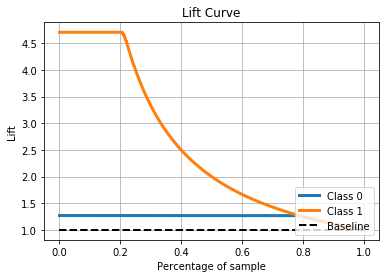


 ===============Results for TestSet 1================== 

Accuracy 0.9200750469043152
F1-score [0.93967715 0.88160089]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1693
           1       0.96      0.82      0.88       972

    accuracy                           0.92      2665
   macro avg       0.93      0.90      0.91      2665
weighted avg       0.92      0.92      0.92      2665



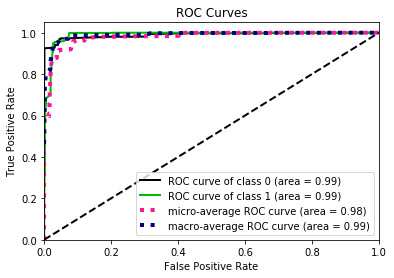

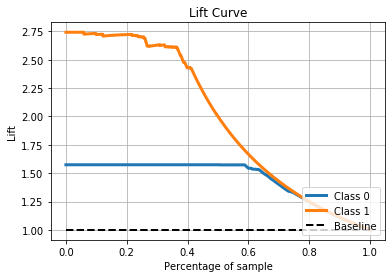


 ===============Results for TestSet 2================== 

Accuracy 0.9392945036915504
F1-score [0.9623122  0.84404636]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7703
           1       0.92      0.78      0.84      2049

    accuracy                           0.94      9752
   macro avg       0.93      0.88      0.90      9752
weighted avg       0.94      0.94      0.94      9752



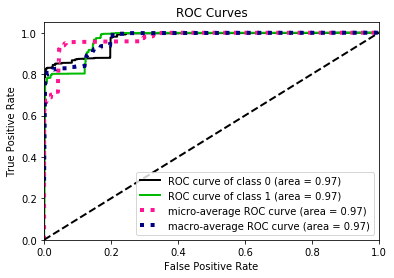

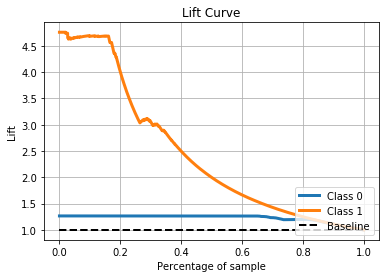

In [47]:
show_report(tests,clf)

# base_estimator=RandomForestClassifier

In [48]:
clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       


 ===============Results for Training================== 

Accuracy 0.994269340974212
F1-score [0.99636175 0.98651252]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1924
           1       0.99      0.99      0.99       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



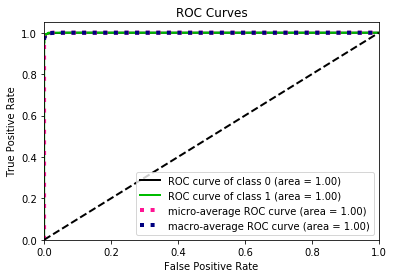

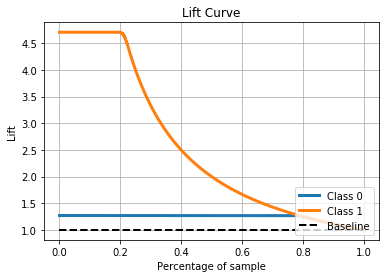


 ===============Results for TestSet 1================== 

Accuracy 0.9208255159474672
F1-score [0.94074698 0.88072357]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1693
           1       0.98      0.80      0.88       972

    accuracy                           0.92      2665
   macro avg       0.94      0.90      0.91      2665
weighted avg       0.93      0.92      0.92      2665



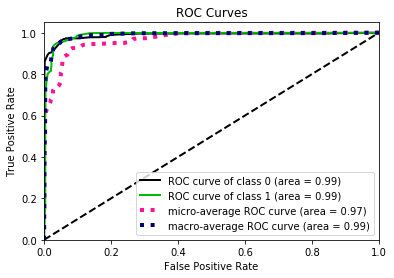

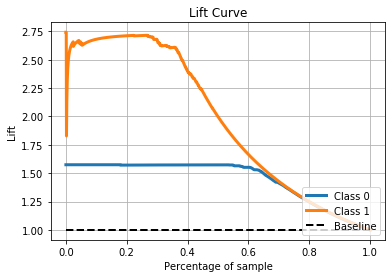


 ===============Results for TestSet 2================== 

Accuracy 0.949343724364233
F1-score [0.968821   0.86502732]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7703
           1       0.98      0.77      0.87      2049

    accuracy                           0.95      9752
   macro avg       0.96      0.88      0.92      9752
weighted avg       0.95      0.95      0.95      9752



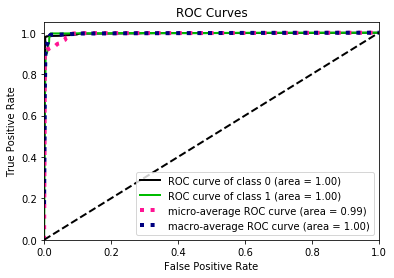

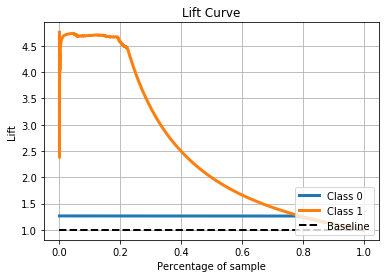

In [49]:
show_report(tests,clf)

In [79]:
cm = confusion_matrix(X_test, y_pred, labels=None, sample_weight=None, normalize=None)
print(cm)
sns.heatmap(cm, annot=True,fmt="d",cmap='Oranges')

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [50]:
# bottom is boiler plate codes 

In [22]:
df_report = pd.DataFrame()

for test, results in tests:
    
    y_pred = clf.predict(test)
    results = pd.DataFrame(classification_report(results, y_pred, output_dict=True))
    print(results.T)
    df_report = pd.concat([df_report, results.T], axis=1 )

              precision    recall  f1-score     support
0              0.994303  0.997921  0.996109  1924.00000
1              0.992188  0.978805  0.985451   519.00000
accuracy       0.993860  0.993860  0.993860     0.99386
macro avg      0.993245  0.988363  0.990780  2443.00000
weighted avg   0.993854  0.993860  0.993845  2443.00000
              precision    recall  f1-score      support
0              0.848790  0.994684  0.915964  1693.000000
1              0.986784  0.691358  0.813067   972.000000
accuracy       0.884053  0.884053  0.884053     0.884053
macro avg      0.917787  0.843021  0.864516  2665.000000
weighted avg   0.899121  0.884053  0.878435  2665.000000
              precision    recall  f1-score      support
0              0.931085  0.996235  0.962559  7703.000000
1              0.980795  0.722792  0.832256  2049.000000
accuracy       0.938782  0.938782  0.938782     0.938782
macro avg      0.955940  0.859513  0.897408  9752.000000
weighted avg   0.941529  0.938782  0.

In [23]:
# this code will delete unwanted things

df_report.drop(['support'], axis=1, inplace=True)
df_report.drop(['macro avg','weighted avg'], axis=0,inplace=True)

df_report.to_excel('/Users/piyush2017/Downloads/07_ensemble.xlsx')
df_report.head(5)

,precision,recall,f1-score,precision,recall,f1-score,precision,recall,f1-score
0,0.994303,0.997921,0.996109,0.848790,0.994684,0.915964,0.931085,0.996235,0.962559
1,0.992188,0.978805,0.985451,0.986784,0.691358,0.813067,0.980795,0.722792,0.832256
accuracy,0.993860,0.993860,0.993860,0.884053,0.884053,0.884053,0.938782,0.938782,0.938782


In [70]:
def doall():
    
    for test, results in tests:

        y_pred = clf.predict(test)
        print('\n ===============Results for {}================== \n')
        print('Accuracy %s' % accuracy_score(results, y_pred))
        print('F1-score %s' % f1_score(results, y_pred, average=None))
        print(classification_report(results, y_pred))
        y_score = clf.predict_proba(test)
        plot_roc(results, y_score)
        plot_lift_curve(results, y_score)
        cm=confusion_matrix(test, y_pred, labels=None, sample_weight=None, normalize=None)
        print(cm)
        sns.heatmap(cm, annot=True,fmt="d",cmap='Oranges')
        plt.show()
        
    
    
#     df_report = pd.DataFrame()

    for test, results in tests:
    
        y_pred = clf.predict(test)
        results = pd.DataFrame(classification_report(results, y_pred, output_dict=True))
#         print(results.T)
#         df_report = pd.concat([df_report, results.T], axis=1 )

    # this code will delete unwanted things

#     df_report.drop(['support'], axis=1, inplace=True)
#     df_report.drop(['macro avg','weighted avg'], axis=0,inplace=True)

#     df_report.to_excel('/Users/piyush2017/Downloads/07_ensemble.xlsx')
#     df_report.head(5)